In [ ]:
!pip install pycaret[full]

### SETUP

In [1]:
# loading the dataset

from pycaret.datasets import get_data
data = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [2]:
# init setup

from pycaret.classification import *
s = setup(data = data, target = 'default', session_id=123)

,Description,Value
0,session_id,123
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(24000, 24)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


### MODEL

In [3]:
#compare models

best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8206,0.7652,0.3782,0.6732,0.4839,0.3857,0.4094,0.2280
lightgbm,Light Gradient Boosting Machine,0.8205,0.7751,0.3782,0.6727,0.4838,0.3854,0.4091,0.6600
ridge,Ridge Classifier,0.8200,0.0000,0.3561,0.6841,0.4679,0.3725,0.4015,0.0410
gbc,Gradient Boosting Classifier,0.8196,0.7786,0.3590,0.6792,0.4694,0.3731,0.4007,5.6200
catboost,CatBoost Classifier,0.8187,0.7776,0.3742,0.6660,0.4786,0.3793,0.4027,6.5070
ada,Ada Boost Classifier,0.8183,0.7729,0.3422,0.6843,0.4556,0.3610,0.3925,1.2400
rf,Random Forest Classifier,0.8158,0.7614,0.3670,0.6546,0.4700,0.3691,0.3919,3.0440
et,Extra Trees Classifier,0.8044,0.7328,0.3676,0.6000,0.4552,0.3444,0.3601,2.2790
lr,Logistic Regression,0.7774,0.6439,0.0003,0.1000,0.0005,0.0004,0.0046,0.7410
dummy,Dummy Classifier,0.7773,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0260


In [4]:
print(best_model)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)


In [5]:
#create a model

rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8155,0.7648,0.3717,0.6495,0.4728,0.3708,0.3921
1,0.8149,0.7631,0.3529,0.6567,0.4591,0.3594,0.3847
2,0.8208,0.7617,0.4064,0.6580,0.5025,0.4006,0.4179
3,0.8125,0.7370,0.3529,0.6439,0.4560,0.3541,0.3775
4,0.8155,0.7850,0.3984,0.6368,0.4901,0.3847,0.4005
5,0.8173,0.7638,0.3583,0.6667,0.4661,0.3677,0.3935
6,0.8220,0.7622,0.3636,0.6904,0.4764,0.3813,0.4098
7,0.8107,0.7566,0.3449,0.6386,0.4479,0.3458,0.3697
8,0.8048,0.7455,0.3413,0.6124,0.4384,0.3316,0.3523
9,0.8243,0.7741,0.3797,0.6927,0.4905,0.3951,0.4212


In [6]:
#tune model

tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8208,0.7611,0.3476,0.6952,0.4635,0.3700,0.4020
1,0.8125,0.7334,0.3102,0.6705,0.4241,0.3297,0.3648
2,0.8310,0.7593,0.3957,0.7184,0.5103,0.4184,0.4456
3,0.8119,0.7253,0.2941,0.6790,0.4104,0.3188,0.3584
4,0.8238,0.7700,0.3743,0.6931,0.4861,0.3910,0.4181
5,0.8143,0.7519,0.2941,0.6962,0.4135,0.3242,0.3668
6,0.8202,0.7438,0.3396,0.6978,0.4568,0.3642,0.3981
7,0.8155,0.7436,0.3369,0.6702,0.4484,0.3519,0.3819
8,0.8137,0.7498,0.2960,0.6938,0.4150,0.3248,0.3666
9,0.8267,0.7487,0.3690,0.7150,0.4868,0.3950,0.4264


### PLOTS

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


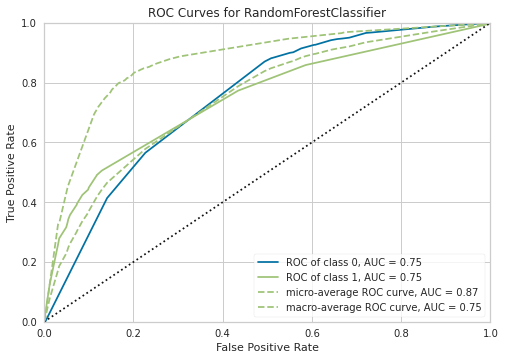

In [7]:
plot_model(tuned_rf, plot = 'auc')

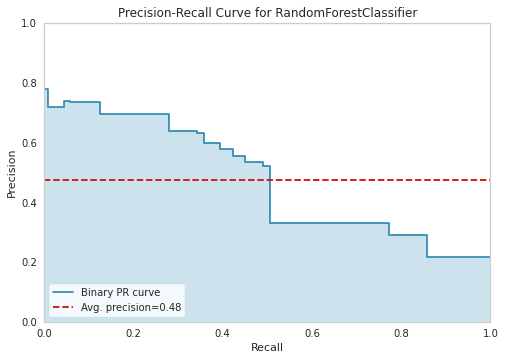

In [15]:
plot_model(tuned_rf, plot = 'pr')

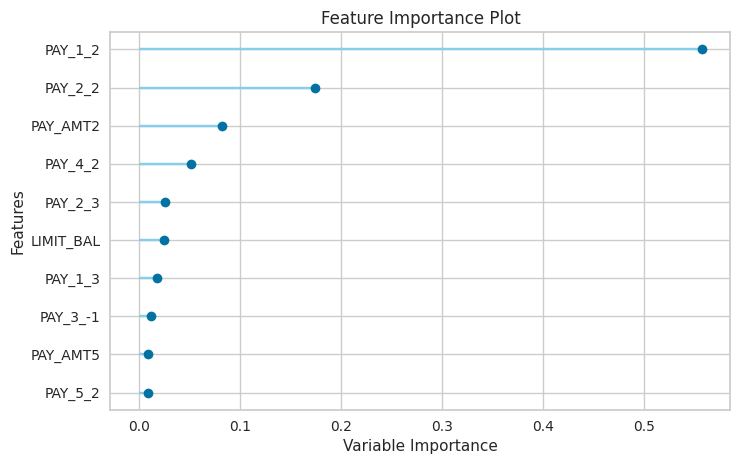

In [9]:
plot_model(tuned_rf, plot='feature')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


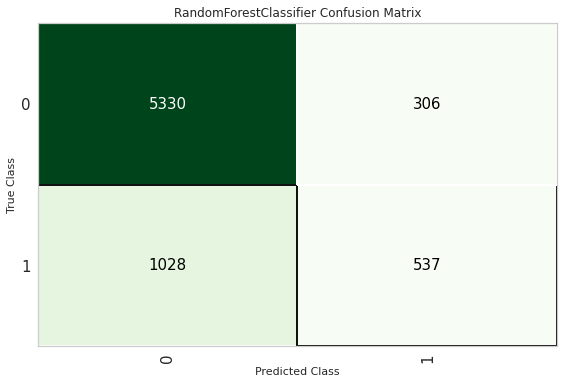

In [10]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [11]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### FINALISE AND SAVE MODEL

In [13]:
# finalize the model
final_best = finalize_model(best_model)
# save model to disk
save_model(final_best, 'Binary Classification Model PyCaret')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('dummy', Dummify(target='default')),
                 ('fix_perfect', Remove_100(target='default')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 (